WNixalo | 20181112 | fast.ai DL1v3 L2

---

In [1]:
%matplotlib inline
from fastai import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

create a column of numbers for the x's, and a column of 1's.

Instead of having a special case of $y = ax+b$, instead we'll always have a second x value which is always 1 – thus allowing us to do a simple matrix-vector product. $y = a_1x_1 + a_2x_2$

Ahh, interesting. So our biases are encoded into the weights then?

In [3]:
x = torch.ones(n,2) # create an n x 2 tensor of 1's
x[:,0].uniform_(-1.,1) # replace col0 with uniform random numbers
x[:5]

tensor([[-0.6318,  1.0000],
        [ 0.0486,  1.0000],
        [-0.5819,  1.0000],
        [-0.1692,  1.0000],
        [-0.3766,  1.0000]])

create some coefficients; a1 is `3`, a2 is `2`

This creates a 'vector' or rank-1 tensor. `3` & `2` represent the coefficients: the slope (3) and intercept (2) of our line.

Ref: Fast.ai DL1v3 Lesson 2 [[1:21:35](https://youtu.be/Egp4Zajhzog?t=4895)]

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

generate data by creating a line via `x@a` and add some random noise to it.

The columns of 1s is just to make the linear function convenient.

In [5]:
y = x@a + torch.rand(n)

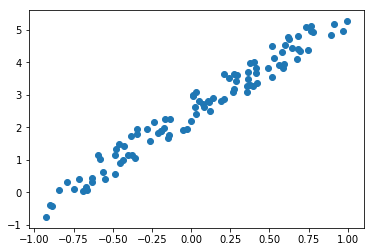

In [6]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

Now, we're going to pretend we don't know the values of the coefficients (`a`) are 3 & 2. And we have to figure them out.

DL1v3 Lesson 2 @ [[1:26:39](https://youtu.be/Egp4Zajhzog?t=5199)]
> if we can find a way to find those 2 parameters to fit that line to those 100 points, we can also fit arbitrary functions that convert from pixel values to probabilities.
>
> The techniques we're going to learn to find these 2 numbers, work equally well for the 50 million numbers in ResNet34.

*parameters* in machine learning are *coefficients* in statistics.

A **regression** problem is where the dependent variable is continuous. In mathematics the actual is $y$ and the prediction: $\hat{y}$

In [12]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

The above function in mathematical form is: $\frac{\sum_{i=1}^n{(\hat{y_i}-y_i)}^2}{n}$

Codal and Mathematical forms are both just notations of the same thing; but the code notation is executable – allowing you to experiment – while the math note. is abstract.

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [13]:
a = tensor(-1.,1)

In [18]:
y_hat = x@a
mse(y_hat, y)

tensor(6.9835)

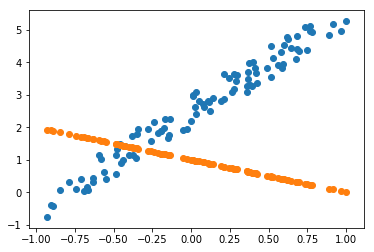

In [19]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [23]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [24]:
def update():
    y_hat = x@a  # prediction
    loss = mse(y, y_hat)  # MSE
    if t % 10 == 0: print(loss)  # printout
    loss.backward()  # calculate gradient
    with torch.no_grad(): # turnoff gradient calculations when updating SGD
        a.sub_(lr * a.grad) # subtract learning rate x gradient from coeffs a inplace
        a.grad.zero_() # zero-out the gradients

PyTorch keeps track of how our loss, mse, was calculated for us, and lets us calculate the derivative.
> So if you do a mathematical operation on a tensor in pytorch, you can call `backward` to calculate the derivative.

In [25]:
lr = 1e-1
for t in range(100): update()

tensor(6.9835, grad_fn=<MeanBackward1>)
tensor(1.4813, grad_fn=<MeanBackward1>)
tensor(0.5689, grad_fn=<MeanBackward1>)
tensor(0.2572, grad_fn=<MeanBackward1>)
tensor(0.1468, grad_fn=<MeanBackward1>)
tensor(0.1077, grad_fn=<MeanBackward1>)
tensor(0.0939, grad_fn=<MeanBackward1>)
tensor(0.0889, grad_fn=<MeanBackward1>)
tensor(0.0872, grad_fn=<MeanBackward1>)
tensor(0.0866, grad_fn=<MeanBackward1>)


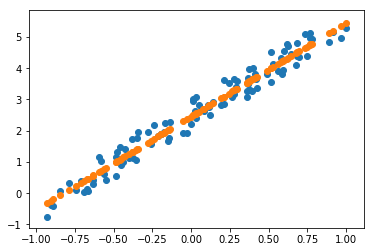

In [26]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [27]:
from matplotlib import animation, rc
rc('animation', html='html5')

You may need to uncomment the following to install the necessary plugin the first time you run this:<br/>(after you run following commands, make sure to restart the kernal for this notebook)<br/>If you are running in colab, the installs are not needed; just change the cell above to be ... html='jshtml' instead of ... html='html5'

In [ ]:
#! sudo add-apt-repository -y ppa:mc3man/trusty-media  
#! sudo apt-get update -y 
#! sudo apt-get install -y ffmpeg  
#! sudo apt-get install -y frei0r-plugins 

instead of writing a loop, we call matplotlib's `animation.FuncAnimation`, to run `animate` 100 times.

Our `animate` function just calls the `update` we wrote above, and updates the `y_data` of our line before returning it.

In [28]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

That's essentially SGD visualized. The only difference between SGD and this is mini-batches.

___

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.